In [1]:
import random
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
# Liczba wszystkich ważnych głosów
liczba_wszystkich_glosow = 19_603_784

In [3]:
# Dane kandydatów
kandydaci = {
    "Trz": 6_147_797, # Rafał Trzaskowski
    "Naw": 5_790_804, # Karol Nawrocki
    "Men": 2_902_448, # Sławomir Mentzen
    "Bra": 1_242_917, # Grzegorz Braun
    "Hol": 978_901, # Szymon Hołownia
    "Zan": 952_832, # Adrian Zandberg
    "Bie": 829_361, # Magdalena Biejat
    "Sta": 243_479, # Krzysztof Stanowski
    "Sen": 214_198, # Joanna Senyszyn
    "Jak": 150_698, # Marek Jakubiak
    "Bar": 95_640, # Artur Bartoszewicz
    "Mac": 36_371, # Maciej Maciak
    "Woc": 18_338, # Marek Woch
}

In [4]:
# Generowanie listy głosów
lista_glosow = []
# Dla każdego kandydata stwórz listę zawierającą jego skrót powtórzony tyle razy, ile ma głosów
# Wszystkie listy dołącz do lista_glosow
for kandydat, liczba_glosow in kandydaci.items():
    lista_glosow.extend([kandydat] * liczba_glosow)

In [5]:
# Sprawdzenie czy wygenerowana lista głosów odpowiada liczbie wszystkich ważnych głosów
assert len(lista_glosow) == liczba_wszystkich_glosow, f"Błąd: {len(lista_glosow)} != {liczba_wszystkich_glosow}"
# Wyświetlenie ilości wygenerowanych głosów
print(len(lista_glosow))

19603784


In [6]:
# Losowanie czterech próbek po 50 000, 5 000, 500 i 50 głosów
# Dzięki funkcji sample, każdy głos pojawia się w próbce tylko raz
probka_50_000= random.sample(lista_glosow, 50_000)
probka_5_000= random.sample(lista_glosow, 5_000)
probka_500= random.sample(lista_glosow, 500)
probka_50= random.sample(lista_glosow, 50)

probki = [
    ("Próbka 50 000", probka_50_000),
    ("Próbka 5 000", probka_5_000),
    ("Próbka 500", probka_500),
    ("Próbka 50", probka_50),
]

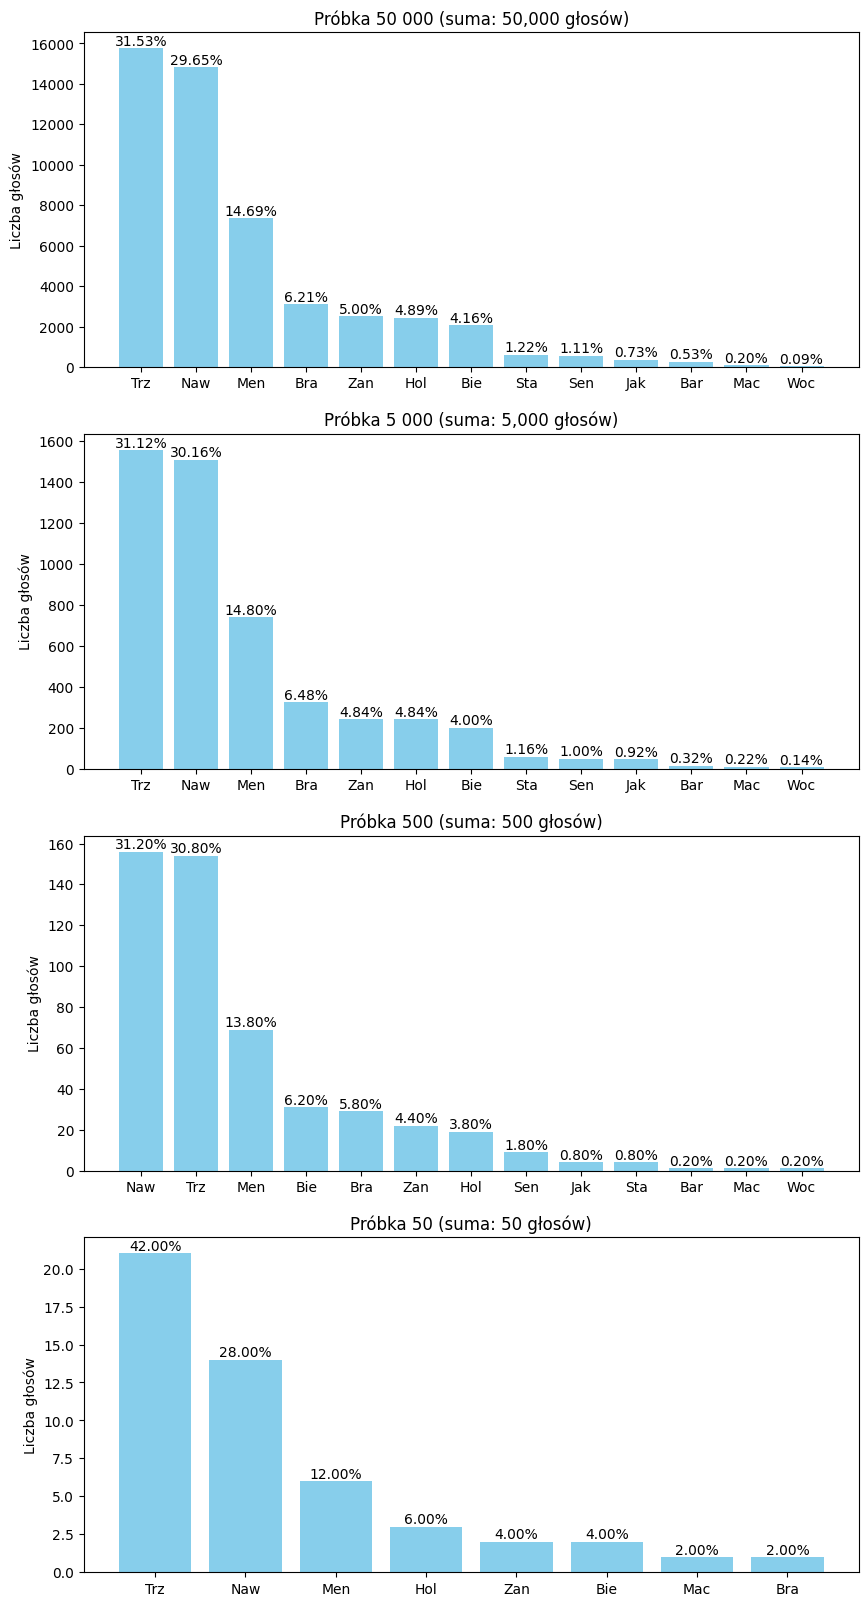

In [7]:
# Przygotowanie czterech wykresów jeden pod drugim
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(10,20))

# Iteracja jednocześnie po każdym wykresie i próbce
# axs to lista osi, a probki to lista krotek (nazwa, probka)
for ax, (nazwa, probka) in zip(axs, probki):
    # Liczenie głosów w próbce
    licznik_probki = Counter(probka)
    # Sortowanie próbki
    posortowana_probka = sorted(licznik_probki.items(), key=lambda x: x[1], reverse=True)
    # Rozpakowanie na dwie osobne zmienne
    posortowani_kandydaci, posortowane_glosy = zip(*posortowana_probka)
    # Liczenie sumy dla przyszłego liczenia procentów
    suma_glosow = sum(posortowane_glosy)

    # Rysowanie wykresu słupkowego i zapisanie obiektów słupków do zmiennej bars
    bars = ax.bar(posortowani_kandydaci, posortowane_glosy, color='skyblue')

    # Dodanie tytułu wykresu oraz pospisu osi y
    ax.set_title(f"{nazwa} (suma: {suma_glosow:,} głosów)")
    ax.set_ylabel(f"Liczba głosów")

    # Iteracja jednocześnie po słupkach w zmiennej bars oraz po liczbach głosów w krotce posortowane_glosy
    for bar, glosy_kandydata in zip(bars, posortowane_glosy):
        wysokosc = bar.get_height()
        # Obliczenie procentów
        procent = glosy_kandydata / suma_glosow * 100
        # plt.text(x, y, tekst) dodaje tekst do wykresu w punkcie o współrzędnych (x, y)
        ax.text(bar.get_x() + bar.get_width()/2, wysokosc, f"{procent:.2f}%", ha='center', va='bottom')

plt.show()